Deployment of the Building model
---
After model built, it is one step left to complete the work: Deployment for Service. 完成模型建構之後，我們開始考慮呢如何將模型佈置特別是在網路上做服務.
Here, there are several kinds considered, 考慮下面幾種實作:
1. [streamlit](#Streamlit), (front-end UI + Web service), 前端使用者介面加網路服務
2. [Docker](#Docker), 
3. streamlit+ fastapi, 
4. [streamlit + keroku](#Deployment-on-Heroku) Deploy streamlit on Heroku platform, 在 Heroku 平台上實作 Streamlit app

### Save result
```python
final_cat = finalize_model(cat_model)
save_model(final_cat, 'fastapi/deployment_20221101_1')
```



# Streamlit 

**Streamlit requires protobuf, but conflicts with the last version; install protobuf==3.20.2**.

Deployment of project includes three layers, 實作模型包含下列三個階段，前端，資料存取，模型:
```
Steamlit App

Front-end UI. <----> Data Manipulation <----> Model

⬆︎⎯⎯⎯⎯     Steamlit        ⎯⎯⎯⎯⎯⬆︎      


```
Here, we introduce the Streamlit package to deploy the application, including UI and web app itself, 這裡利用 streamlit 實作包含前端和網路服務的部分.

1. Create the following file, `app.py`, in certain sub-folder, 在資料目錄中，新增主要檔案 app.py:

```python
### app.py
# required packages, 加入安函式庫

import streamlit as st
from pycaret.regression import load_model, predict_model

# load model pkl for prediction, 讀取 pkl 檔案的模型
model = load_model('deployment_20221101_1')

# Web Page title, 設定網頁名稱
st.title('Laptop Prices Predictor')

# selection input, 新增選取欄位
Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

# numerical input , 新增新增數值型欄位
ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)

# radio input, 新增點選的欄位
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
...
# Convert selected features into array, 轉換選擇的特徵成為陣列
features=[Company_of_laptop, ram_in_gb, touchscreen, ...]
final_features = np.array(features).reshape(1, -1)

# if clicked, predict the result and output, 如送出，印出預測的結果
if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {prediction[0]}')
```

And startup the service by follows:
```shell
> streamlit run app.py
```

In [ ]:
from pycaret.regression import *

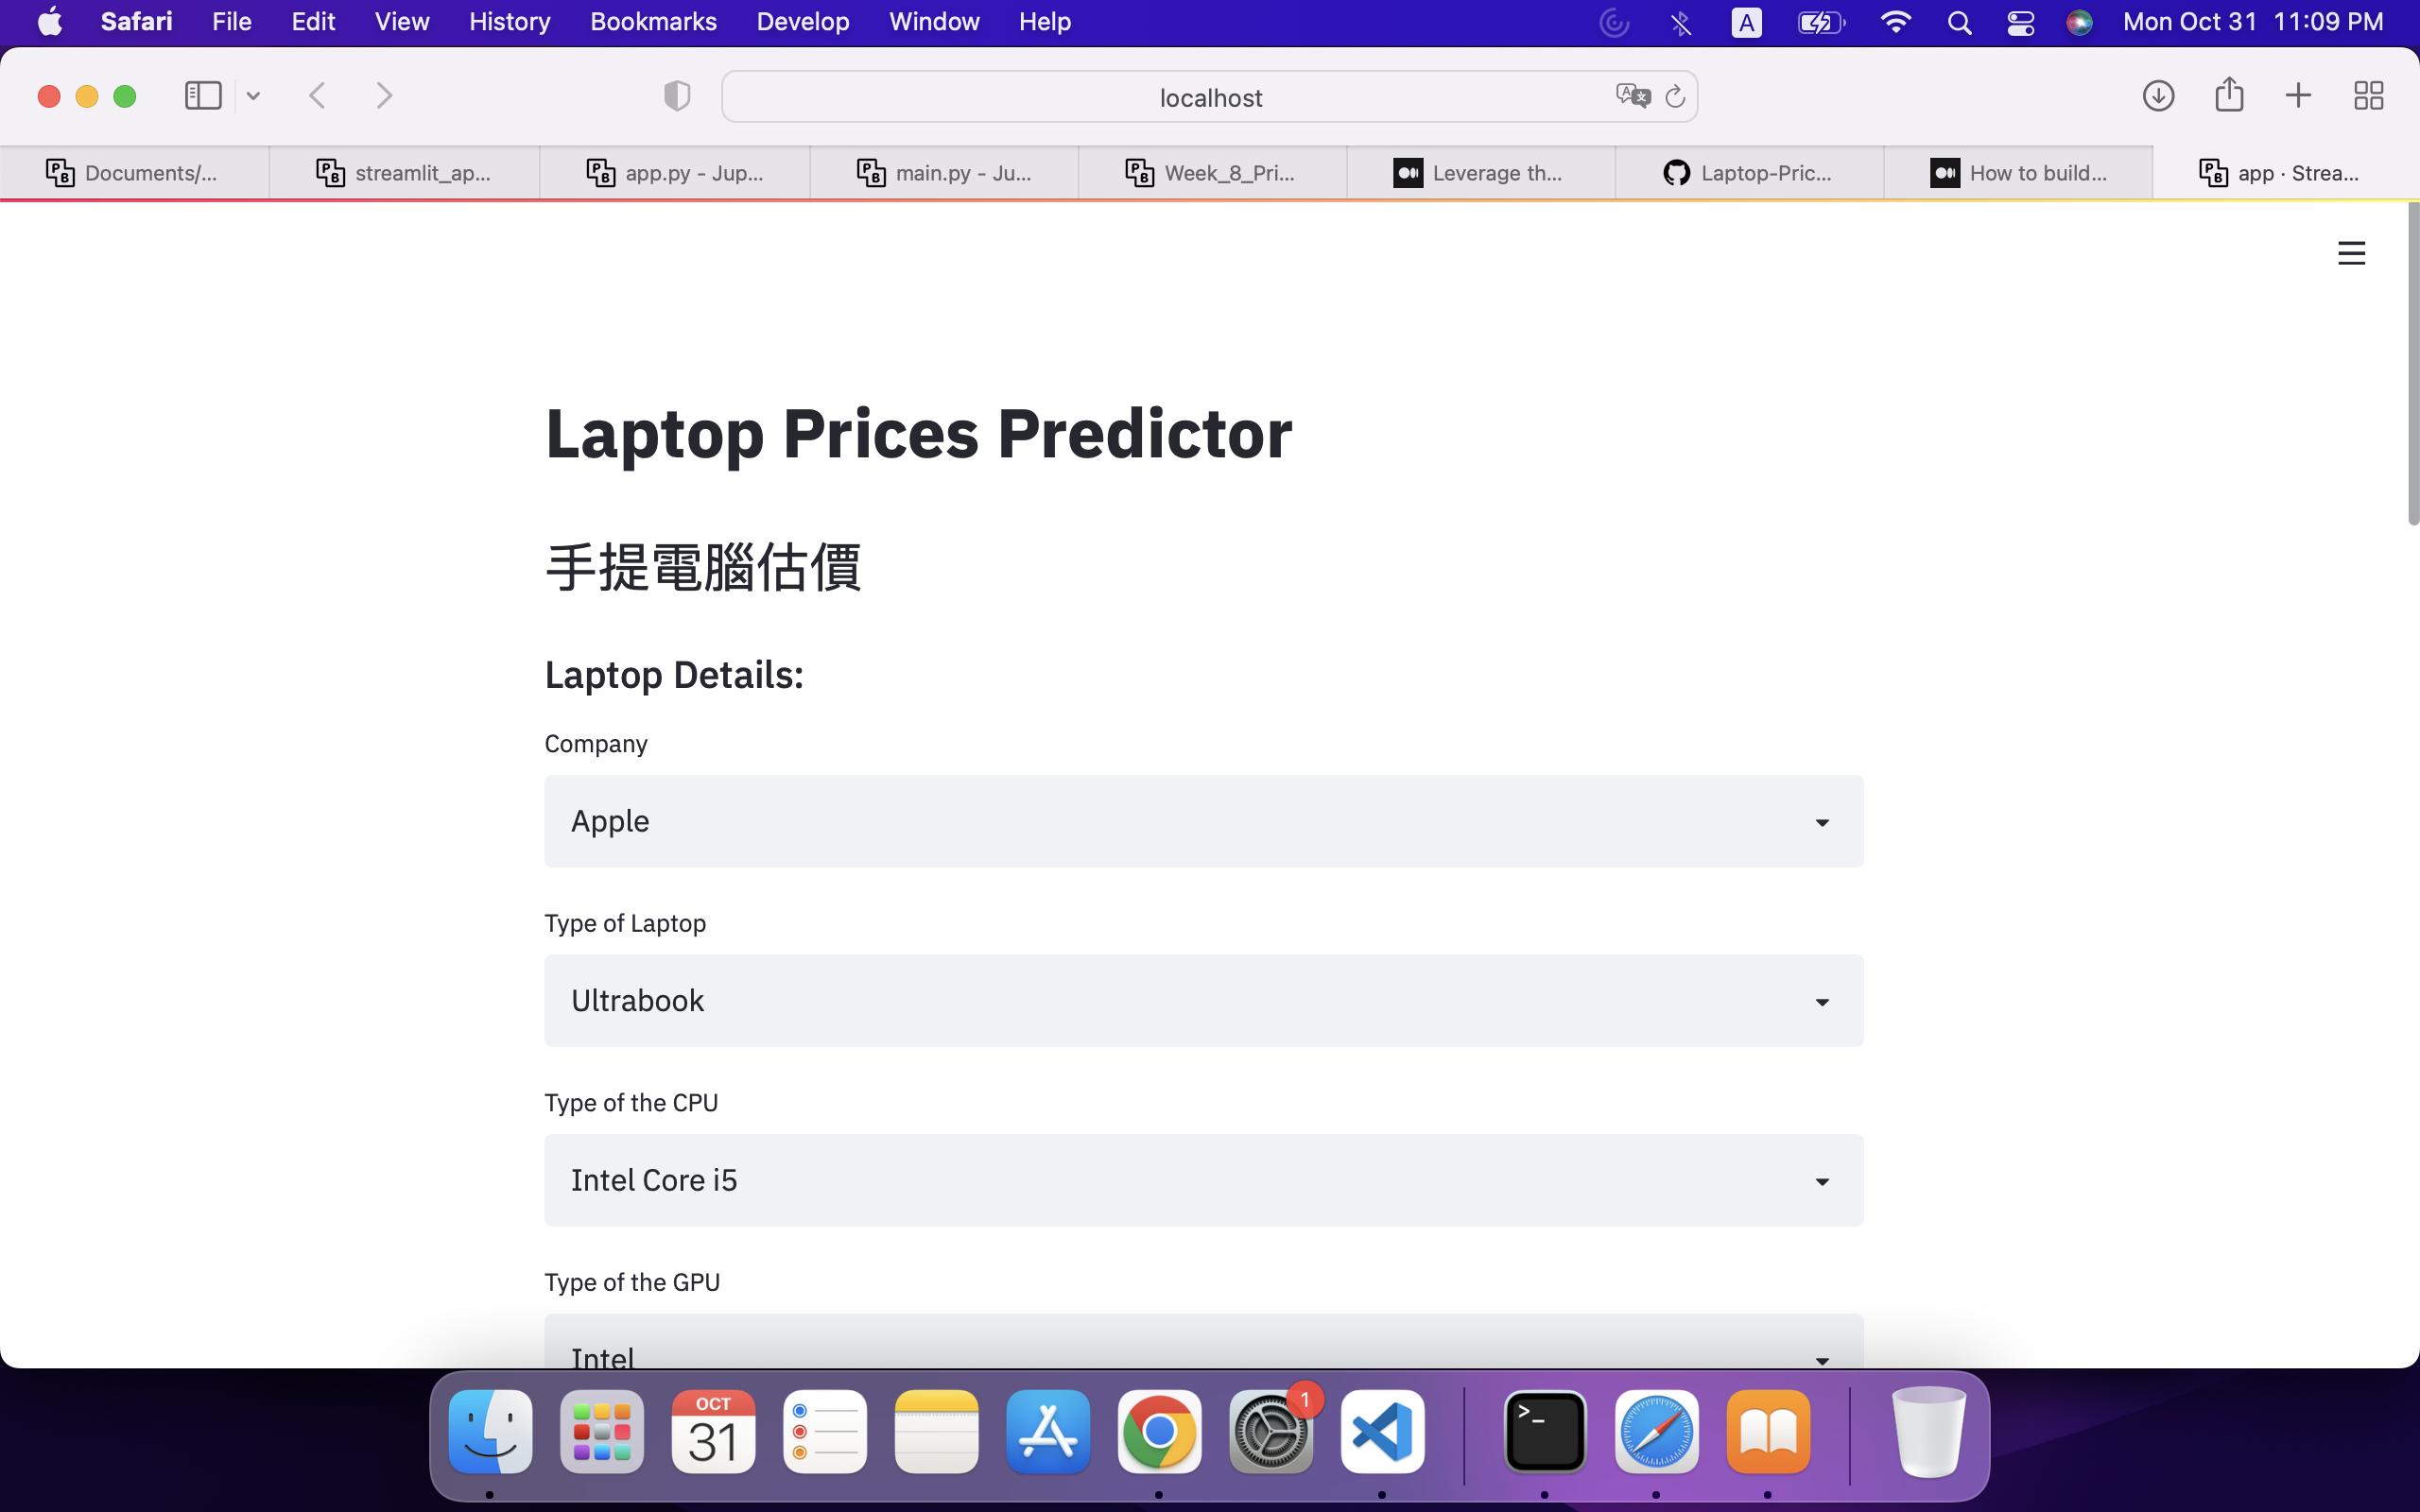

In [1]:
from IPython.display import Image
Image("laptop.png")

Project Structure
---
```
porject folder
              ➜ app.py
              ➜ deployment_20221101_1.pkl
              ➜ Laptop_price_EDA.csv
```
### app.py
```python

import streamlit as st
import joblib
import numpy as np
import pandas as pd
import sklearn
from pycaret.regression import load_model, predict_model

df = pd.read_csv('Laptop_price_EDA.csv')
st.title('Laptop Prices Predictor ')

# load model in pkl
model = load_model('deployment_20221101_1')

st.markdown( "## 手提電腦估價")
st.subheader('Laptop Details:')

# features considered in model
features_=['Company_name_encoded', 'TypeName_name_encoded',
           'Cpu_brand_name_encoded', 'CPU_vel', 'GPU_name_encoded', 'Ram',
           'first_type_name_encoded', 'first_size', 'second_type_name_encoded',
           'second_size', 'Touchscreen', 'Ips', 'Inches', 'ppi', 'os_name_encoded',
           'Price']

def label_dict(df_,feature,label_='_name_encoded'):
    feature_lab=feature+label_
    return {k: v for k, v in zip(df_[feature].unique(), df_[feature_lab].unique() )}

def select_type(opt,feature_opt):
    dic_=df_lab.loc[df_lab.index==feature_opt,'label'][0]
    return dic_[opt]

cat_f=['Company', 'TypeName','Cpu_brand', 'GPU', 'first_type', 'second_type','os']

label_array=[]
for cat in cat_f:
    cat_=label_dict(df,cat) 
    label_array.append(cat_)

df_lab=pd.DataFrame(index=cat_f)
df_lab['label']=label_array    

Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

TypeName=st.selectbox("Type of Laptop", options=df["TypeName"].unique())
TypeName_of_laptop = select_type(TypeName,'TypeName')

Cpu_brand = st.selectbox("Type of the CPU", options=df["Cpu_brand"].unique())
Cpu_brand_of_laptop = select_type(Cpu_brand,'Cpu_brand')

GPU = st.selectbox("Type of the  GPU", options=df["GPU"].unique())
GPU_of_laptop = select_type(GPU,'GPU')

first_type = st.selectbox("First Storage", options=df["first_type"].unique())
first_type_of_laptop = select_type(first_type,'first_type')

second_type = st.selectbox("Second Storage", options=df["second_type"].unique())
second_type_of_laptop = select_type(second_type,'second_type')

os = st.selectbox("Operation System", options=df["os"].unique())
os_of_laptop = select_type(os,'os')

ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)
size_in_inches = st.number_input('Size of the laptop in Inches', step=0.1, min_value=10.0)
CPU_vel = st.number_input('Velocity of CPU', step=0.4, min_value=1.0)
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
Ips  = st.radio("IPS Screen (0-No,1-Yes)", options=[0, 1])

ppi = st.number_input('Revolustion of ppi', step=10, min_value=90)
first_size = st.number_input('Size of First Storage', step=32, min_value=32)
second_size = st.number_input('Size of Second Storage', step=32, min_value=0)

features=[Company_of_laptop, TypeName_of_laptop, Cpu_brand_of_laptop, CPU_vel, GPU_of_laptop, ram_in_gb, \
          first_type_of_laptop, first_size, second_type_of_laptop, second_size, \
          touchscreen, Ips, size_in_inches, ppi, os_of_laptop]
# convert list to one of element of list
# [...] ➜ [[...]]

final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction = model.predict(final_features)
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {int(prediction[0])}')
```



Note
---
This is made by simple rules which might be not suitable: for instance, only `Mac OS` could be installed on Mac notebook laptops, and only armed-based CPU is the unique choice for it now, but not considered here. To imporove the model accuracy and the exact equipment availed in market, some condition have to be considered,這裡僅考慮一個簡單的案例，可能不符合實際的狀況，例如：蘋果手提電腦只安裝 Mac OS，而現今蘋果電腦只配備自行設計的 Arm-based 中央處理器, 你如果要增加模型的準確率並合乎市場的供給狀況，必須考慮更多的真實狀況例子:
1. Bind the option Company with OS together ，公司品牌必須跟作業系統同時考慮？
2. Storage Size: Recently, the cost of SSD has been decreasing very fast and the unit of such device is mostly calculated by `n × 128` G; this option would be adjusted if any recent data are added. 由於價格狂跌，SSD 已經廣為市場使用主流，而且都以 128 G 為單位，如果為現在的機型估計，這個條件必須重新考慮;
3. streamlit also supports the `slider option`: `st.slider`; option in wild range could be changed by this choice, streamlit 支援滑桿的選項，可以用來配合上述記憶模組的條件.

Docker
---
In a grouped developed work, it is a long way to finalize the work, including coding, correcting, and testing stages; it is necessary to build a same working environment for every developer, 通常發展過程都是一個很長的過程，包含程式設計，修改，和測試等階段，為每一個發展者設立相同的發展環境是必要的. This problem could be solved by introducing Docker solution which could build an image to run on certain project and run possibly on mostly operation system, Docker 可以解決這個要求的方案，他可以製造一個在各種不同作業系統執行的映象檔，提供相同的功能供不同的使用者操作. In this following, we will demonstrate how to make a docker image for the streamlit app, 我們將介紹如何製作 streamlit 的 Docker 映像檔案.  

1. requirements.txt

```
streamlit==1.14.0
numpy==1.22.4
pandas==1.4.4
pycaret==3.0.0rc4
catboost==1.1

```

2. Dockerfile

```shell
# frontend/Dockerfile

FROM python:3.8

COPY requirements.txt 

WORKDIR /app

RUN pip install -r requirements.txt

COPY . /app

EXPOSE 8501

ENTRYPOINT ["streamlit","run"]
CMD ["app.py"]
```
  - install based on Python-3.8
  - install required packages
  - copy all files into `app` folder
  - use port `8501
  - execute `streamlit` by app.py  

3. after completed setup specification file above, activate docker server, create docker, and test, 完成上述的設定檔案，可以啟動Docker ，產生 docker 並測試:

```shell
> docker build -t mystapp:latest .
> docker run -p 8501:8501 mystapp:latest
```
4. Share and run the local deploy by the last command.

Note
---
To prevent to conflict with `pycaret`, use numpy-1.22.4 and pandas-1.4.4; also install catboost for model predition since built by catboost, 為了避免和 pycaret 版本衝突，使用 numpy-1.22.4 和 pandas-1.4.4，同時加入 catboost 函式庫.

In [1]:
import streamlit
streamlit.__version__

'0.81.1'

In [2]:
import numpy
numpy.__version__


'1.23.4'

In [3]:
import pandas
pandas.__version__

'1.5.1'

## Fastapi + streamlit, and Docker

[link](https://medium.com/@goradbj/how-to-build-complete-end-to-end-ml-model-backend-restapi-using-fastapi-and-front-end-ui-using-22f64bf04476)

This solution is combination of Streamlit and fastapi: the first used for UI design and the other for building web framework of service, 這個組合包含 Streamlit 和 fastapi，前者用來設計前端介面，後者後者用來建網路服務架構： 

```
Steamlit + FastAPI App

Front-end UI. <----> Data Manipulation  <----> Model

⬆︎- Steamlit -⬆︎  ⥨  ⬆︎- fastapi-⬆︎

```

Here, two folders were created for fastapi and streamlit respectively, 新增兩個子目錄 Sstreamlit 和 fastapi:


## Fastapi Deploy Part, Fastapi 實作部分

there are two files included as follows, one is main code and one is model itself, 這個部分包含兩個檔案，一個主程式一個模型：
```
fastapi
    ➜ main.py
    ➜ deployment_20221101_1
```
Main code, main.py, 主程式
```python
from pycaret.regression import load_model, predict_model
from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn

# 2. Create the app object
app = FastAPI()

# . Load trained Pipeline
model = load_model('deployment_20221101_1')

lass price_metrics(BaseModel):
    Company_of_laptop: float
    TypeName_of_laptop: float
    Cpu_brand_of_laptop : float
    CPU_vel : float
    GPU_of_laptop : float
    ram_in_gb : float
    first_type_of_laptop : float
    first_size : float
    second_type_of_laptop : float
    second_size : float
    touchscreen : float
    Ips : float
    size_in_inches : float
    ppi : float
    os_of_laptop : float
	
# Define predict function
@app.post('/predict')
def get_potability(data: price_metrics):
    received = data.dict()
    Company_of_laptop=received['Company_of_laptop']
    TypeName_of_laptop=received['TypeName_of_laptop']
    Cpu_brand_of_laptop=received['Cpu_brand_of_laptop']
    CPU_vel=received['CPU_vel']
    GPU_of_laptop=received['GPU_of_laptop']
    ram_in_gb=received['ram_in_gb']
    first_type_of_laptop=received['first_type_of_laptop']
    first_size=received['first_size']
    second_type_of_laptop=received['second_type_of_laptop']
    second_size=received['second_size']
    touchscreen=received['touchscreen']
    Ips=received['Ips']
    size_in_inches=received['size_in_inches']
    ppi=received['ppi']
    os_of_laptop=received['os_of_laptop']
    
    predition = model.predict([features]).tolist()[0]
    return {'Predicted Price of the Laptop is about NT$': predition}
     

if __name__ == '__main__':
    uvicorn.run(app, host='127.0.0.1', port=8000)

```
Run it on shell, 啟動:
```shell
> python main.py
```
and uvicorn web server has started and could be accessed in web browser using `http://127.0.0.1:8000/docs`, 網路應用方程式 uvicorn 會開始在下列網頁連結提供詳細服務名單文件.

## Streamlit Deploy Part, Streamlit 實作部分

there are three filed included, main code, model, and data csv, 在這個目錄包含三個檔案，主程式，模型，資料：
```python
fastapi
    ➜ app.py
    ➜ deployment_20221101_1
    ➜ Laptop_price_EDA.csv
    
```
the app.py in streamlit is listed as follows, 主程式, app.py, 如下:
```python
# >  streamlit run app.py
# ToDo: model order of feature ->features below

import streamlit as st
import numpy as np
import pandas as pd
import requests
import json

#import sklearn
#from pycaret.regression import load_model, predict_model

df = pd.read_csv('Laptop_price_EDA.csv')
st.title('Laptop Prices Predictor ')


st.markdown( "## 手提電腦估價")
st.subheader('Laptop Details:')


features_=['Company_name_encoded', 'TypeName_name_encoded',
           'Cpu_brand_name_encoded', 'CPU_vel', 'GPU_name_encoded', 'Ram',
           'first_type_name_encoded', 'first_size', 'second_type_name_encoded',
           'second_size', 'Touchscreen', 'Ips', 'Inches', 'ppi', 'os_name_encoded',
           'Price']

def label_dict(df_,feature,label_='_name_encoded'):
    feature_lab=feature+label_
    return {k: v for k, v in zip(df_[feature].unique(), df_[feature_lab].unique() )}

def select_type(opt,feature_opt):
    dic_=df_lab.loc[df_lab.index==feature_opt,'label'][0]
    #print(feature_opt, opt," : value ",dic_[opt])
    return dic_[opt]

cat_f=['Company', 'TypeName','Cpu_brand', 'GPU', 'first_type', 'second_type','os']

label_array=[]
for cat in cat_f:
    #cat_=cat+'_dic'
    cat_=label_dict(df,cat) 
    label_array.append(cat_)

df_lab=pd.DataFrame(index=cat_f)
df_lab['label']=label_array    
   
Company = st.selectbox("Company", options=df["Company"].unique())
Company_of_laptop = select_type(Company,'Company')

TypeName=st.selectbox("Type of Laptop", options=df["TypeName"].unique())
TypeName_of_laptop = select_type(TypeName,'TypeName')

Cpu_brand = st.selectbox("Type of the CPU", options=df["Cpu_brand"].unique())
Cpu_brand_of_laptop = select_type(Cpu_brand,'Cpu_brand')

GPU = st.selectbox("Type of the  GPU", options=df["GPU"].unique())
GPU_of_laptop = select_type(GPU,'GPU')

first_type = st.selectbox("First Storage", options=df["first_type"].unique())
first_type_of_laptop = select_type(first_type,'first_type')

second_type = st.selectbox("Second Storage", options=df["second_type"].unique())
second_type_of_laptop = select_type(second_type,'second_type')

os = st.selectbox("Operation System", options=df["os"].unique())
os_of_laptop = select_type(os,'os')

# RAM [ 8, 16,  4,  2, 12,  6, 32, 24, 64]

ram_in_gb = st.number_input('RAM in GB', step=4, min_value=4)
size_in_inches = st.number_input('Size of the laptop in Inches', step=0.1, min_value=10.0)
CPU_vel = st.number_input('Velocity of CPU', step=0.4, min_value=1.0)
touchscreen  = st.radio("Touchscreen (0-No,1-Yes)", options=[0, 1])
Ips  = st.radio("IPS Screen (0-No,1-Yes)", options=[0, 1])
ppi = st.number_input('Revolustion of ppi', step=10, min_value=90)
first_size = st.number_input('Size of First Storage', step=32, min_value=32)
second_size = st.number_input('Size of Second Storage', step=32, min_value=0)


features=[Company_of_laptop, TypeName_of_laptop, Cpu_brand_of_laptop, CPU_vel, GPU_of_laptop, ram_in_gb, \
          first_type_of_laptop, first_size, second_type_of_laptop, second_size, \
          touchscreen, Ips, size_in_inches, ppi, os_of_laptop]
final_features = np.array(features).reshape(1, -1)

if st.button('Predict'):
    prediction=requests.post(url="http://127.0.0.1:8000/predict",data=final_features)
    
    st.balloons()
    st.success(f'Predicted Price of the Laptop is about NT$ {int(prediction[0])}')
    
```
Now the activate the app by, 啟動下列網路服務
```shell
> streamlit run app.py
```
which will display the service link.

Note
---
If tested by docker, two dockers have to be created for `fastapi` and `streamlit` rspectively for different services, 如果使用測試必須分別產生兩個映像檔案，一個為 fastapi 另外一個 streamlit. 

Deployment on Heroku
---
1. [link-1](https://www.analyticsvidhya.com/blog/2021/11/laptop-price-prediction-practical-understanding-of-machine-learning-project-lifecycle/)
2. [link](https://github.com/jrieke/traingenerator)

Heroku is a web-based cloud platform. We can deploy a python app on this heroku for public service, Heroku 是一個提供網路服務的平台, 我們可以藉由它建立上述的實作.

1. register a free Heroku accound, 申請 Heroku 新帳號.
2. install `heroku-cli` for manipulation the app sources among local box, github repository and heroku，安裝 `heroku-cli` 來操作 `個人電腦，github repo, Heroku`，之間的連結操作.



GitHub
---
As well-known Version-Control System, GitHub, on which more than million developers put their sources code. Hithub 是一個聚集很多發展者的版本管理系統，Here is a brief introduction about set up a repository on GitHubm 我們簡單介紹如何在 Github 上面儲存程式資源:
1. sign in a new account and login, 註冊新帳號，;
2. create a repository, for instance: `Sticky`，新增 repo `Sticky`;
3. create a new sub-directory on local box, `github-src` for instance; enter into it and run the following as github suggested after you created new repository，在自己的電腦上新增一個目錄, `github-src`,進入目錄中，然後執行下列指令連結: 
```shell
# open terminal and enter into github-src
> echo "# 2016-1" >> README.md
> git init
> git add README.md
> git commit -m "first commit"
> git remote add origin https://github.com/$User/Sticky.git
> git push -u origin master
```

where replace `$User` by your exact account, 其中 `$User`  為真實的帳號名稱.  Now copy all the files into sub-folder and run the following snippet to upload the codes，將所有的檔案放置到個人電腦的該目錄中並執行下列指令上傳:
```shell
> git add -A .
> git commit -m "file uploaded"
> git push
```
You can also use a tool, smartgit as GUI git, 也可以使用圖形界面的 smartgit. Before use it, apply a free license for education use, 使用前可申請一個免費的教育帳號許可.

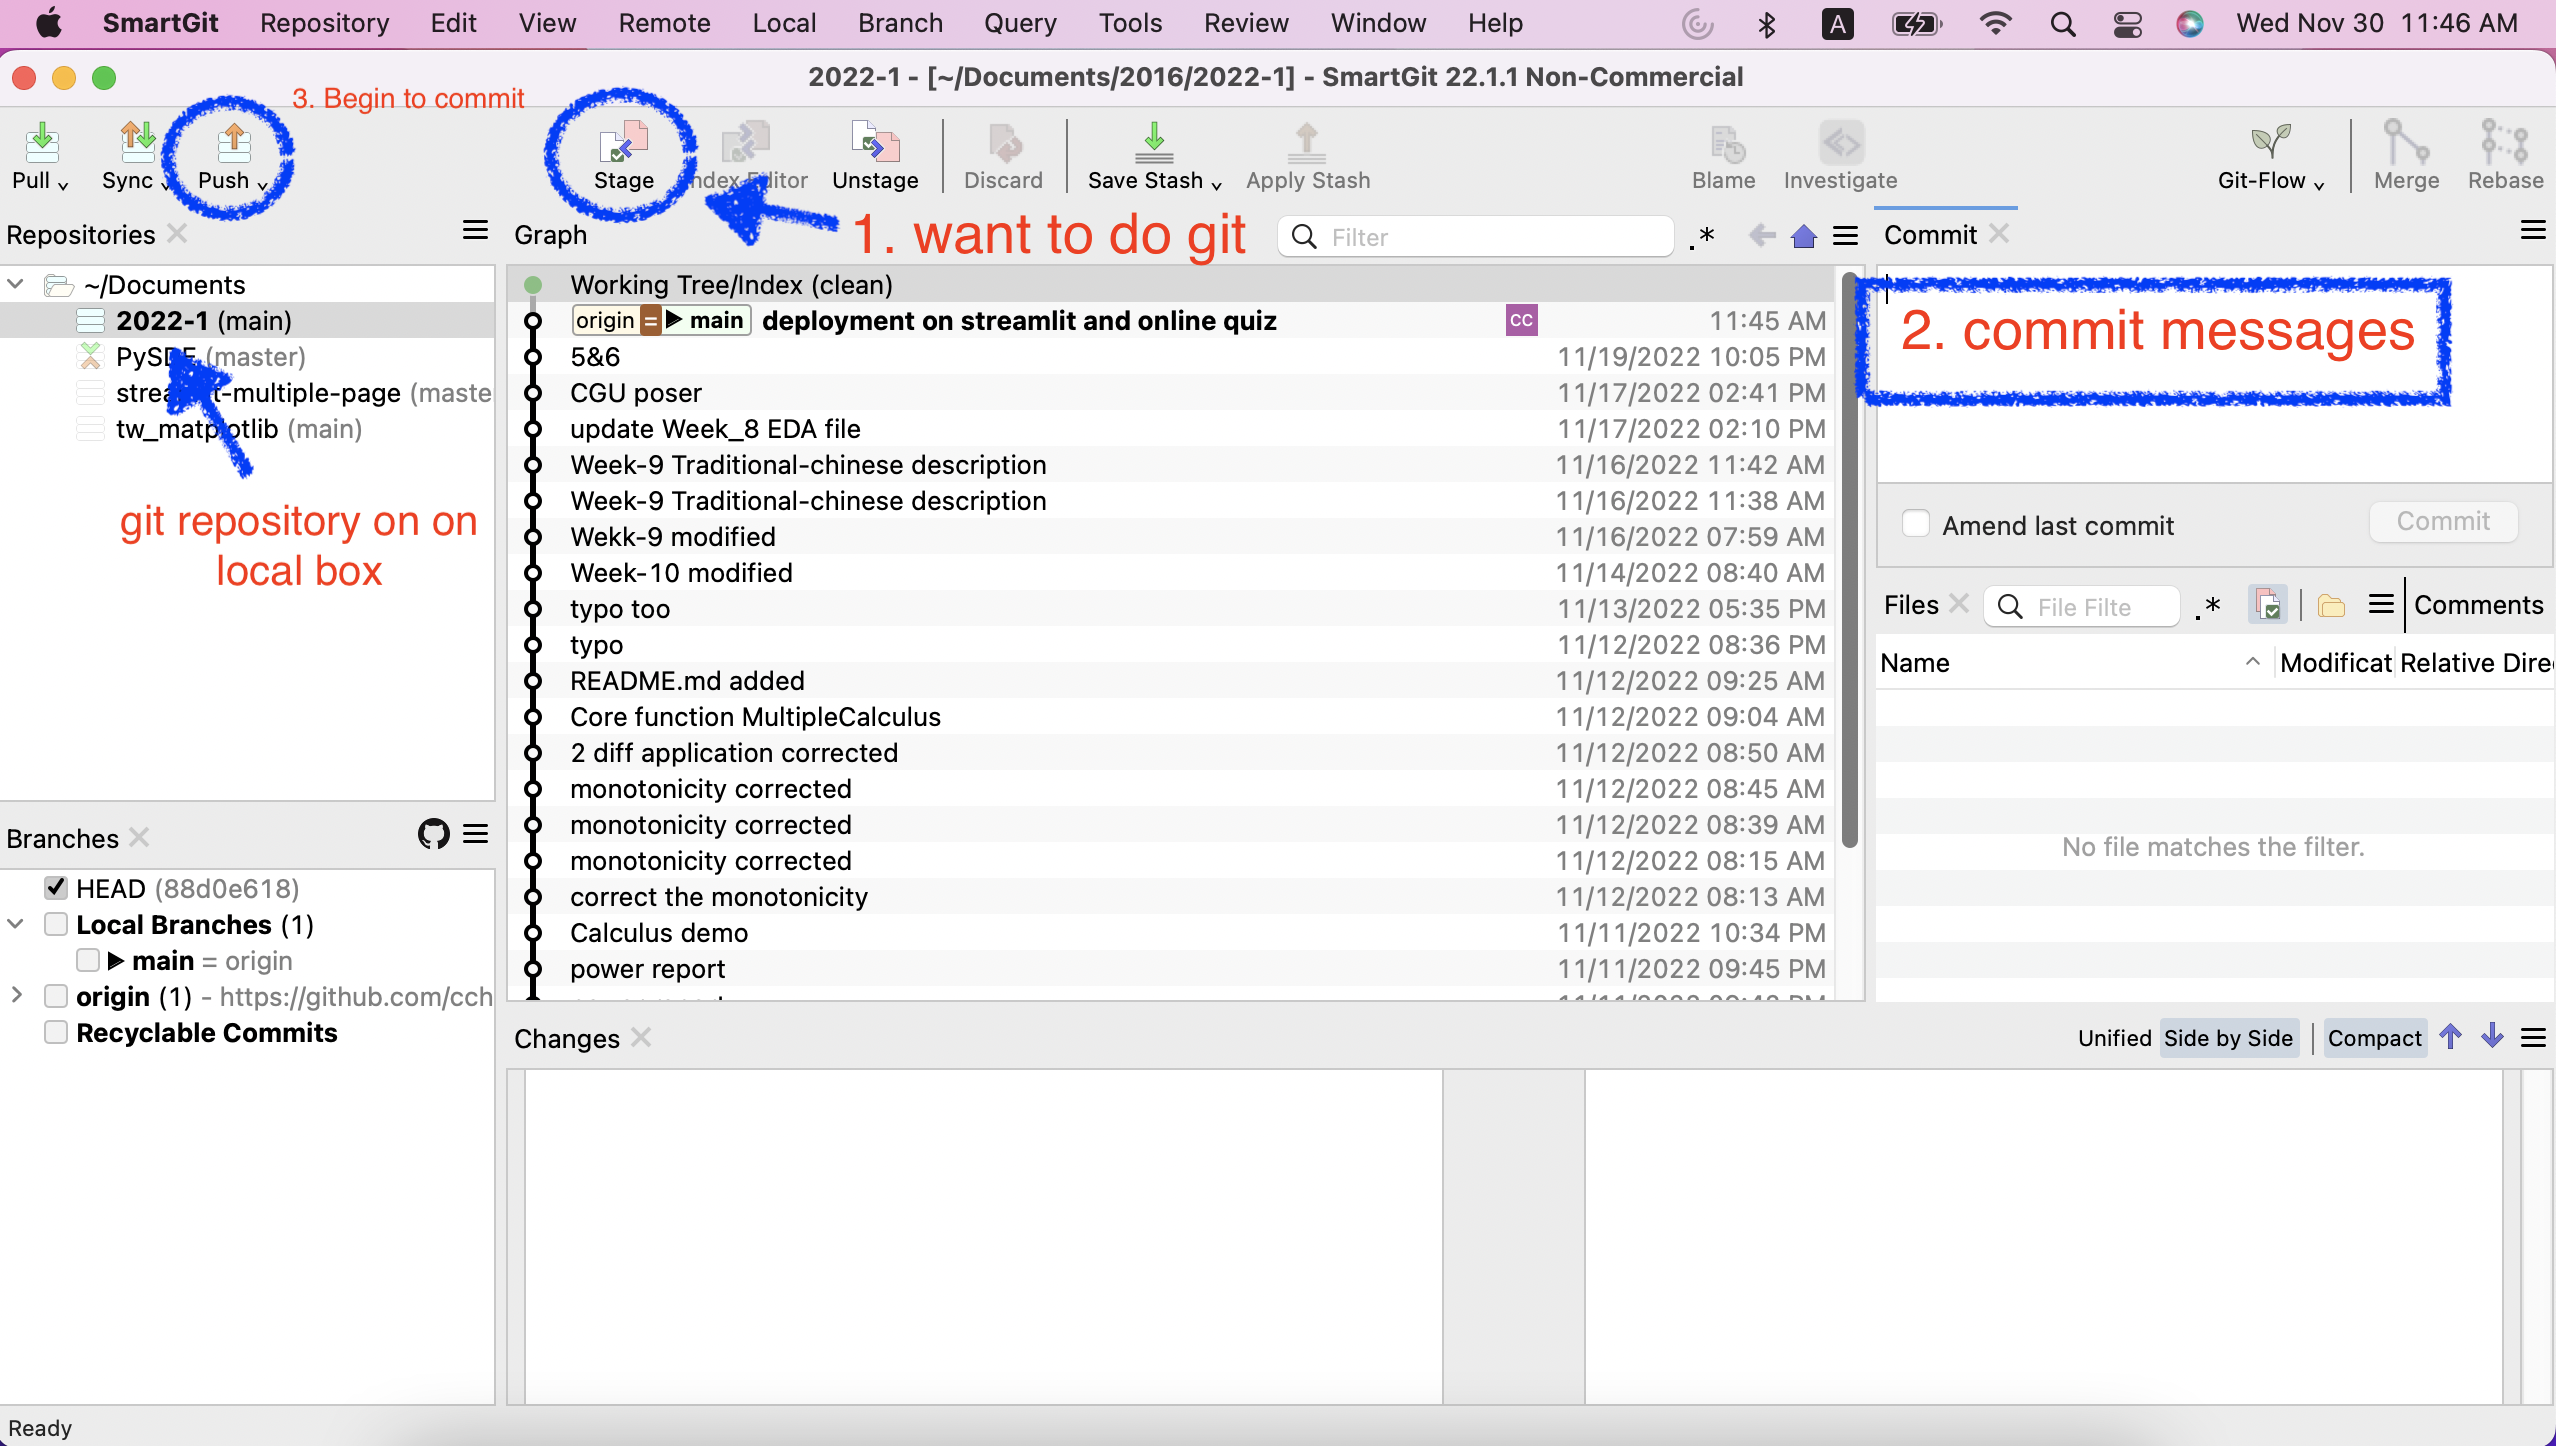

In [2]:
Image("imgs/smartgit.png")


Steps
---
1. Create an initialor file of Heroku, 新增初始化 Heroku 的檔案，`Procfile`:
```shell
web: sh setup.sh && streamlit run app.py
```
2. Prepare file for pre-installed pachages list for deployment in the cloud, 準備雲端詩作中，需要事先安裝的函式庫:
   - `requiremets.txt`
3. create a setup file, `setup.sh` as follows, 新增設定檔:

```shell
mkdir -p ~/.streamlit/

echo "\
[server]\n\
port = $PORT\n\
enableCORS = false\n\
headless = true\n\
\n\
" > ~/.streamlit/config.toml

```
in which creates a new file, `config.toml`, within `.streamlit` folder, 上述動作，就是在子目錄 .streamlit 中新增 config.toml 檔案 . 

4.  Upload Code to Github: prepare the code source as follows, 將下列檔案上傳到 Github:
```
porject folder ($app-folder)
              ➜ app.py
              ➜ deployment_20221101_1.pkl
              ➜ Laptop_price_EDA.csv
              ➜ Procfile
              ➜ setup.sh
```
   - create a new github repository, named `streamlit-deploy`, 新增 Github repo， `streamlit-deploy`:
   - upload the code to new github repository as follows, 上傳檔案:
```shell
> cd $app-folder
> git init
> git add -A
> git commit -m "first commit"
> git remote add origin https://github.com/cchuang2009/streamlit-deploy.git
> git push -u origin master
```

5. Login [Heroku](https://dashboard.heroku.com/terms-of-service), 進入帳號
   - [Create new app], 新增應用程式 :  `price-model`(正式名稱)  ⬅︎  <i style="color:red">app-name</i> below,
   - [Deployment method] ➜ <font style="color:white;background-color:black"> github </font>, and connect to the repository. 連結 Github
   - [Manual deploy] ➜ [Deploy Branch]
If build successfully, app will be hosted at  https://<i style="color:red"> app-name </i>.herokuapp.com  for service, here `https://price-model.herokuapp.com` generated, 如果設立成功，就會出現網路應用程式的連結位址.

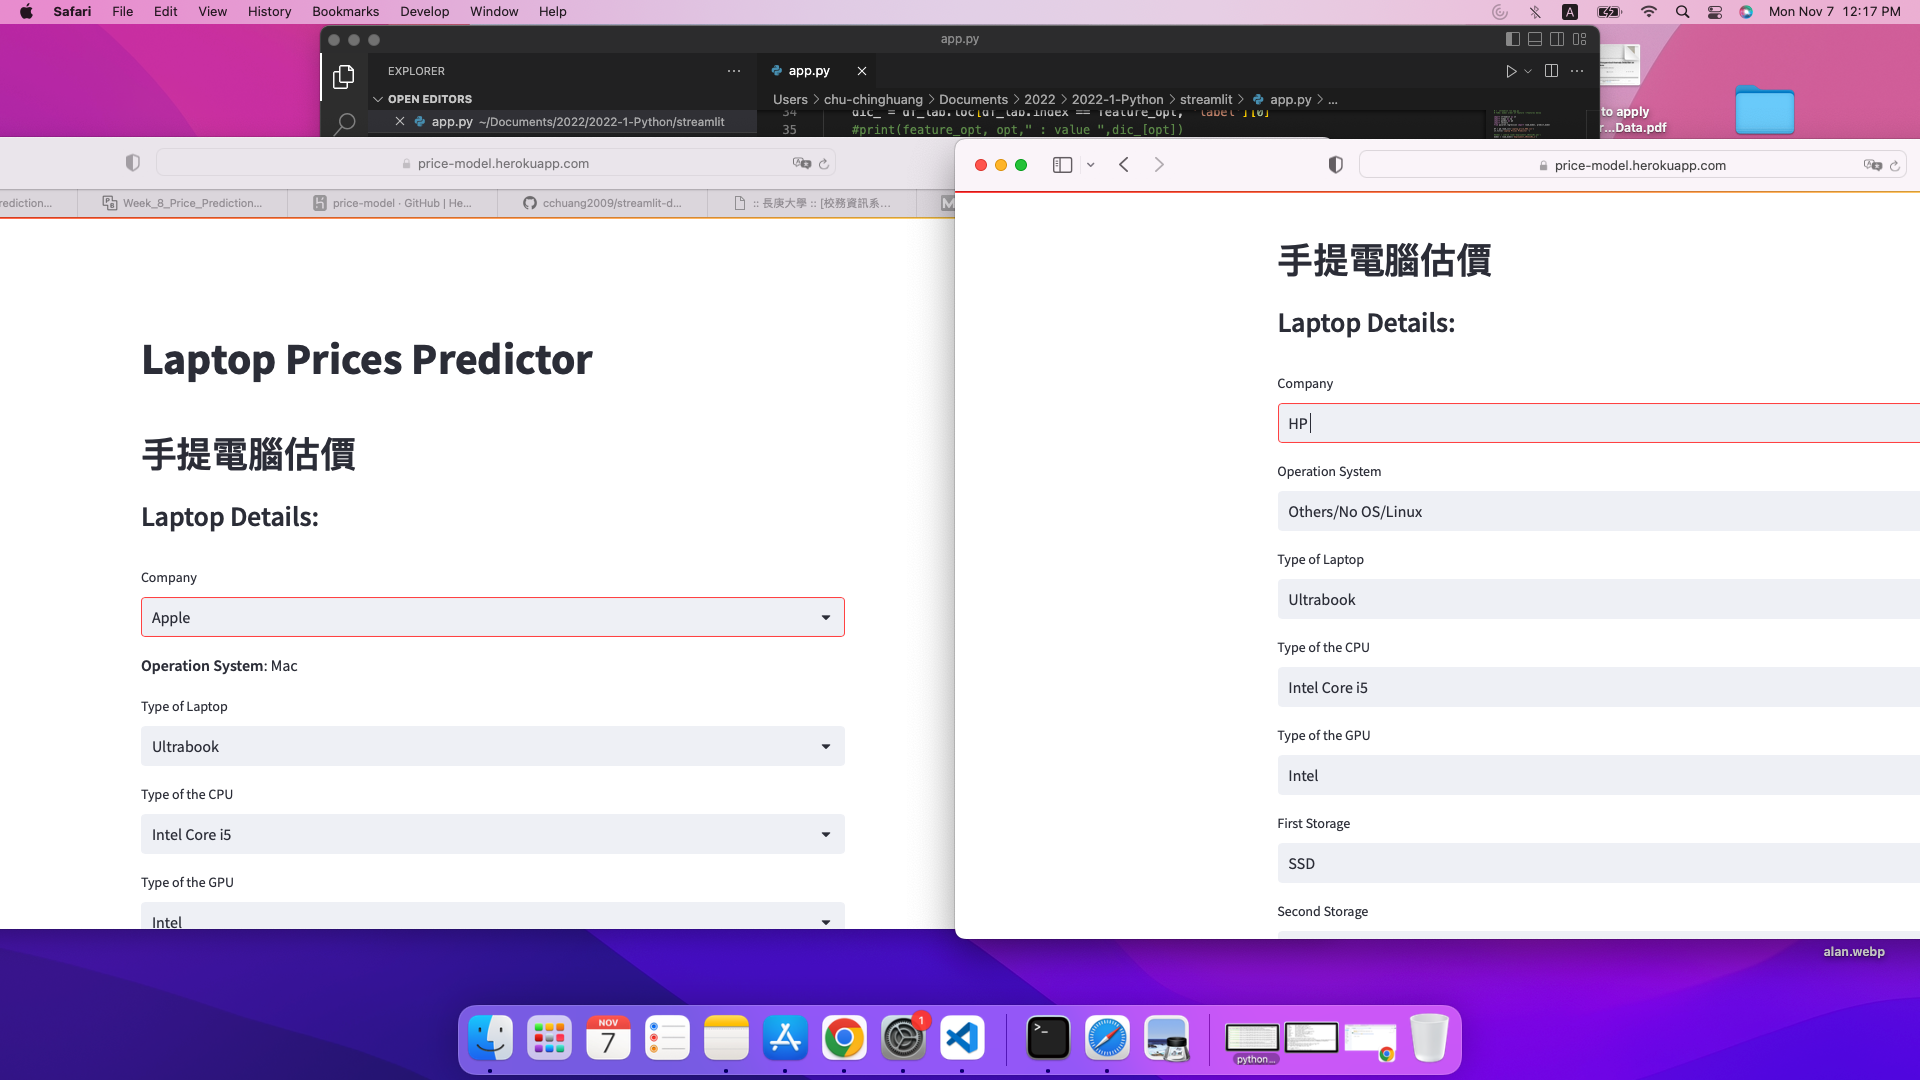

In [1]:
from IPython.display import Image
Image("heroku.png",width=800)

Note
---
Also can deploy from  [share.streamlit.io](https://share.streamlit.io) simply without no more procedure, 另外一個最簡單的方式就是直接在[streamlit]( share.streamlit.io) 官方網站實作:
1. create new app, 新增應用程式
2. connect github repo and the main app.py; and wait, 連結 github repo 的資源和 app.py，等待產生應用程式的連結：
3. [https://cchuang2009-streamlit-deploy-app-ywx9ql.streamlit.app/](https://cchuang2009-streamlit-deploy-app-ywx9ql.streamlit.app/)

Exercise
---
Complete your app on  share.streamlit.io, 完成並測試你的 streamlit 應用程式.



Streamlit Multiple-Page App
---
On-line Quiz App includes the following topics
1. column for login visitor, (sequence number);
2. check where the visitor is on the list;
3. check the visit whether completed the quiz;
4. list a shuffled test sheet.
5. calculate the score and save the result.

Files
---
There are only three files in folder;
1. app.py, the main program;
2. testbank.csv, questions/answers availed
3. list.csv, list of sequence numbers of allowed persons. 

Format of testbank.csv
---
```
Question,Answer
"Python is one of Computer Scripting languages and also is a name of snake.",True
...
```
Format of list.csv
---
```
user,login,score,login_time,answers
B1100001,0,,,
...
```
where `login` is the times of visitor's login

Main Part of app
---
Main codes avails `three` web-pages for services:
1.  setting of app, 

```python
# app.py (I)
# import necessary packages, 加入必要的函式庫
import streamlit as st
import pandas as pd
from datetime import datetime 
import random

# Title, 設定應用程式名稱
st.set_page_config(
    page_title="Quiz for 2022-1-Python_IM"
)

# Initialize Page, 初始化頁面
if "page_id" not in st.session_state:
    st.session_state.page_id = "page1"
    st.session_state.answers = []
    
# Close unnecessary Menu, 關閉不必要的選項 
hide_menu_style = """
        <style>
        #MainMenu {visibility: hidden; }
        footer {visibility: hidden;}
        </style>
        """
# get rid of the tag, <script>, 避免執行上述標籤
st.markdown(hide_menu_style, unsafe_allow_html=True)

df = pd.read_csv("testbank.csv")

df_user = pd.read_csv("list.csv")

# times of tries at most, 最多使用次數
limit=2

...

# at the end, pages provided in this app, 程式最後面，程式所提供的服務頁面
if st.session_state.page_id == "page1":
    page1() 
if st.session_state.page_id == "page2":
    page2()    
if st.session_state.page_id == "page_end":
    page_end() 
```
2. page 1.

```python
# Page 1, Check whether User is allowed, 第一頁，檢查是否被允許登錄
def page1():
    st.markdown(
        "<h1 style='text-align: center;'>Python for 2022-1-IM</h1>",
        unsafe_allow_html=True,
    )
    # save the answers and jump to page2 if clicked, 完成之後儲存檔案並跳到第二頁
    def change_page():
        st.session_state.answers.append(st.session_state.seq_num)       
        st.session_state.page_id = "page2"
        
    # set the dead time and save the login time, 
    # 設定考試期限，並記錄登錄時間到程式 session 變數
    deadtime = datetime(2022, 12, 17, 8, 46, 35, 376768)
    now=datetime.now()
    st.session_state.answers.append(now)
    # return if exceed now time, 如果超過時間，結束
    if now > deadtime:
        st.write(now)
        st.write("Quiz was over!")
        return
    
    # colume for user input one's sequence number, 新增欄位讓使用者輸入序號
    st.markdown("**Input Sequence Number**")   
    with st.form("df_user"):
        seq = st.text_input('Enter your sequence number: ', 'B1100000',key="seq_num")
        st.form_submit_button("Submit", on_click=change_page)
```

3. page 2

```python
def page2():    
    st.markdown(
        "<h1 style='text-align: center;'>Quiz Beginning:</h1>",
        unsafe_allow_html=True,)
   
    # save the shuffled answers and goto the last page, 貯存打亂後的答案並跳到最後一頁 
    def change_page():
        for i in range(len(df)):
            st.session_state.answers.append(st.session_state[ans_name[i]])
        st.session_state.page_id = "page_end"
    
    # get the login's seq number, and chech wheck he/she is allowed
    # 取得使用者輸入的序號, 檢驗使用者是否被允許使用程式 
    seq=st.session_state.answers[1]
    if seq  not in df_user.user.values:
       st.write(seq , ': Not allowed to Take the Quiz!')
       return
    # check wheck the login is still has right to anserw, 檢驗使用者是否已經超出答題次數
    if df_user.loc[df_user.user == seq]['login'].values[0]>=limit:
       st.write(seq,': Already taken the Quiz!')
       return
    
    # shuffle the order of questions, 打亂題目
    p_order=(list(df.index))
    random.shuffle(p_order)
    
    st.write(seq," logined and  on Test now:")
    ans = [0]*len(df)
    ans_name =['ans_'+str(i) for i in range(len(ans))]
    # list the sheet, 顯示題目
    with st.form("f2"):
         for i in range(len(df)):
             question = df['Question'][p_order[i]]
             # print question number in markdown
             st.markdown(f"**Question {i+1}**")
             ans[i]=st.radio(question, options=[True, False],key=ans_name[p_order[i]])
          
         st.form_submit_button("回答", on_click=change_page)       
```

4. Last page

```python
# End of Services, 最後一頁
def page_end():
    st.markdown(
        "<h1 style='text-align: center;'>Congratulations</h1>",
        unsafe_allow_html=True, )
    # login time, 登錄的時間
    now=st.session_state.answers[0]
    # login's sequence number, 登錄者的序號
    seq=st.session_state.answers[1]
    # get the shuffled answer, 取得打亂後的答案
    # while comparing the TRUE answers, it will be re-arranged!
    
    ans=st.session_state.answers[2:]
    # increase the times of login by 1, 將登錄次數增加一
    times = df_user.loc[df_user.user == seq]['login'].values[0]+1
    # scoring, 計算成績
    score = sum(ans == df['Answer'])*100/len(df)
    
    st.markdown("---")
    st.markdown(
        f"<div style='text-align: center;'> Score of {seq}：{score}</div>",
        unsafe_allow_html=True,
    )
    # record the user's info and score, and save, 將使用者的結果存入檔案
    df_user.loc[df_user.user == seq] = [seq, times,score,now,str(ans)]
    df_user.to_csv("list.csv", index=False)
    st.balloons()
```
Note
---
1. if shuffle put outside the `pages`, shuffle action would be activated again if any page was called.
2. At the final scoring step, `answers` and `df['Answer']` will be paired by theirs `exact` indeces; don't shuffle back the order of answers.


git
---
1. [Repository] ➜ [Add an existing  or new repository], choose the local folder
2. as above, go to the local folder at which the codes were saved, and git push them 


Streamlit
---
3. Sign in  [share.streamlit.io](https://share.streamlit.io) by your account
4. [New App] ➜ 
5. add the `primary file`, app.py, in github's repository, to the setting; and create the app;
5. [Visit App](https://cchuang2009-streamlit-multiple-pages-app-9b59eq.streamlit.app)
